In [1]:
import os
from dotenv import load_dotenv
import tempfile
from autogen import ConversableAgent
from IPython.display import Image

In [2]:
temp_dir = tempfile.TemporaryDirectory()

# Local environment

In [13]:
from autogen.coding import LocalCommandLineCodeExecutor

executor = LocalCommandLineCodeExecutor(
    timeout=2, # Timeout for each code excecution in seconds.
    work_dir=temp_dir.name, # Use the temporary directory to store files
)

In [14]:
code_executor_agent = ConversableAgent(
    "code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="NEVER"
)

In [15]:
message_with_code_block = """This is a message with code block.
The code block is below:
```python
import  numpy as np
import matplotlib.pyplot as plt
x = np.random.randint(0, 100, 100)
y = np.random.randint(0, 100, 100)
plt.scatter(x, y)
plt.savefig('scatter.png')
print("Scatter plot saved to scatter.png")
```
This is the end of the message.
"""

# Generate reply
reply = code_executor_agent.generate_reply(
    messages=[
        {
            "role": "user",
            "content": message_with_code_block
        }
    ]
)

print(reply)


>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
exitcode: 124 (execution failed)
Code output: 
Timeout


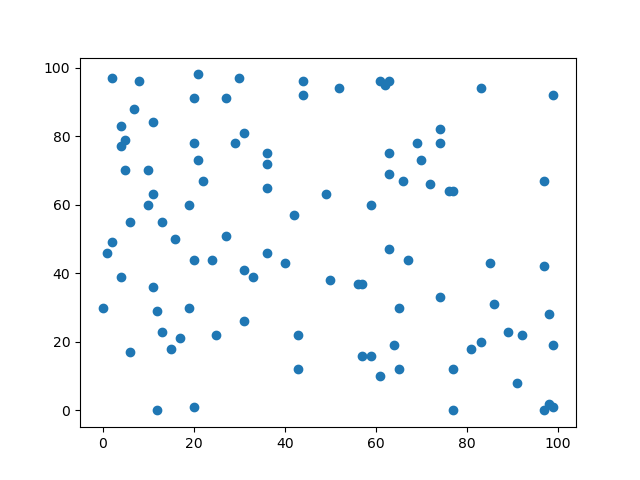

In [16]:
Image(os.path.join(temp_dir.name, "scatter.png"))

# Docker execution

In [26]:
from autogen.coding import DockerCommandLineCodeExecutor

executor_docker = DockerCommandLineCodeExecutor(
    image="python-with-numpy-matplotlib",
    timeout=2,
    work_dir=temp_dir.name,
)

In [27]:
code_executor_agent_with_docker = ConversableAgent(
    "code_executor_agent_docker",
    llm_config=False,
    code_execution_config={"executor": executor_docker},
    human_input_mode="NEVER"
)

In [29]:
# Generate reply
reply_2 = code_executor_agent_with_docker.generate_reply(
    messages=[
        {
            "role": "user",
            "content": message_with_code_block
        }
    ]
)

print(reply)


>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
exitcode: 0 (execution succeeded)
Code output: Scatter plot saved to scatter.png



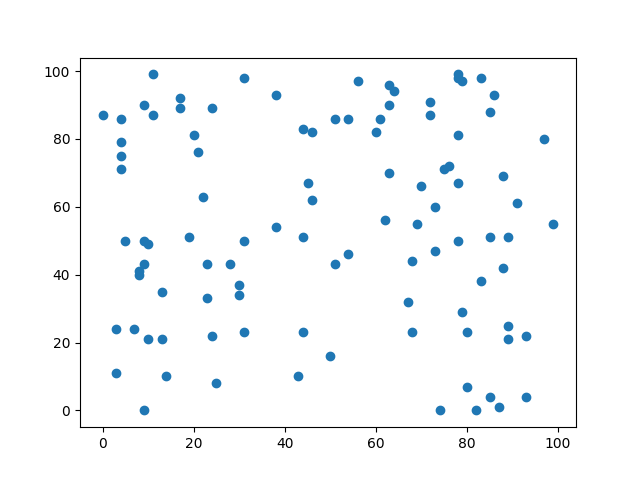

In [30]:
Image(os.path.join(temp_dir.name, "scatter.png"))

In [31]:
!docker ps

CONTAINER ID   IMAGE                          COMMAND     CREATED              STATUS              PORTS     NAMES
b1b3b6d388ca   python-with-numpy-matplotlib   "/bin/sh"   About a minute ago   Up About a minute             autogen-code-exec-1e28cd63-073c-4659-a0f4-cb83bd200358
e0d321f1974e   python-with-numpy-matplotlib   "python"    2 minutes ago        Up 2 minutes                  hungry_black


In [32]:
executor_docker.stop()

In [33]:
!docker ps

CONTAINER ID   IMAGE                          COMMAND    CREATED         STATUS         PORTS     NAMES
e0d321f1974e   python-with-numpy-matplotlib   "python"   3 minutes ago   Up 3 minutes             hungry_black


In [34]:
temp_dir.cleanup()